In [35]:
import requests as rq
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

apiKey = "cd2254b7d1d24127abb7a98a3b0ea10e"
HEADERS = {"X-API-Key": apiKey}
BUNGIE = "https://www.bungie.net/platform/Destiny/"
AccountType = "2"
mid = '4611686018428698313'

In [2]:
cid = '2305843009250714821'

In [292]:
def findRaids(mid, cid, count):
    par = {'mode': 'Raid', 'count': count}
    url = BUNGIE + "Stats/ActivityHistory/" + AccountType + '/' + mid + '/' + cid + '/'
    r = rq.get(url, headers=HEADERS, params = par)
    activities = r.json()['Response']['data']['activities']
    return activities

In [295]:
myraids = json_normalize(findRaids(mid, cid, 50))

In [296]:
myraids

,activityDetails.activityTypeHashOverride,activityDetails.instanceId,activityDetails.isPrivate,activityDetails.mode,activityDetails.referenceId,period,values.activityDurationSeconds.basic.displayValue,values.activityDurationSeconds.basic.value,values.activityDurationSeconds.statId,values.assists.basic.displayValue,...,values.killsDeathsAssists.statId,values.killsDeathsRatio.basic.displayValue,values.killsDeathsRatio.basic.value,values.killsDeathsRatio.statId,values.leaveRemainingSeconds.basic.displayValue,values.leaveRemainingSeconds.basic.value,values.leaveRemainingSeconds.statId,values.playerCount.basic.displayValue,values.playerCount.basic.value,values.playerCount.statId
0,2043403989,6397589811,False,4,856898338,2017-05-02T14:08:20Z,1h 9m,4150.0,activityDurationSeconds,86,...,killsDeathsAssists,8.70,8.700000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
1,2043403989,6396779595,False,4,1387993552,2017-05-02T00:34:28Z,2h 51m,10261.0,activityDurationSeconds,165,...,killsDeathsAssists,16.34,16.343750,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
2,2043403989,6327414056,False,4,856898338,2017-04-10T15:39:49Z,1h 1m,3676.0,activityDurationSeconds,31,...,killsDeathsAssists,2.71,2.705882,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
3,2043403989,6327225968,False,4,856898338,2017-04-10T15:32:33Z,2m 0s,120.0,activityDurationSeconds,0,...,killsDeathsAssists,0.00,0.000000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,1,1.0,playerCount
4,2043403989,6327658596,False,4,856898338,2017-04-10T14:16:33Z,3h 45m,13530.0,activityDurationSeconds,18,...,killsDeathsAssists,2.46,2.461538,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,17,17.0,playerCount
5,2043403989,6304956884,False,4,856898338,2017-04-05T05:08:19Z,2h 59m,10770.0,activityDurationSeconds,27,...,killsDeathsAssists,4.20,4.200000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,9,9.0,playerCount
6,2043403989,6279442259,False,4,4000873610,2017-03-31T01:58:47Z,2h 34m,9265.0,activityDurationSeconds,235,...,killsDeathsAssists,10.17,10.171429,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
7,2043403989,5784027461,False,4,1387993552,2016-10-22T07:06:11Z,1h 53m,6790.0,activityDurationSeconds,149,...,killsDeathsAssists,25.05,25.050000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
8,2043403989,5783648218,False,4,1387993552,2016-10-22T04:41:16Z,2h 24m,8691.0,activityDurationSeconds,308,...,killsDeathsAssists,14.46,14.458333,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
9,2043403989,5769111546,False,4,1387993552,2016-10-19T20:54:01Z,21m 0s,1260.0,activityDurationSeconds,6,...,killsDeathsAssists,30.50,30.500000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,5,5.0,playerCount


In [38]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

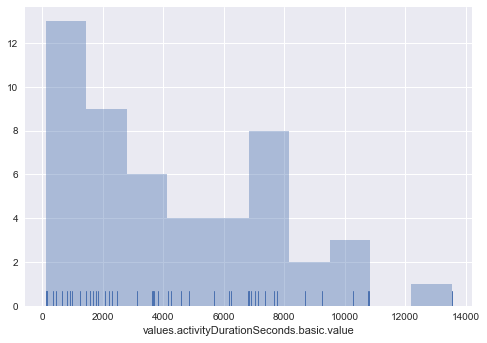

In [46]:
sns.distplot(myraids['values.activityDurationSeconds.basic.value'],bins = 10, kde=False, rug=True)

In [40]:
?sns.distplot

In [48]:
def getReport(instanceId):
    url = BUNGIE + '/Stats/PostGameCarnageReport/' + instanceId + '/'
    r = rq.get(url, headers=HEADERS, timeout = 10)
    return r.json()['Response']['data']

In [47]:
reports = []

In [49]:
for i in  myraids['activityDetails.instanceId']:
    print i
    reports.append(getReport(i))

6397589811
6396779595
6327414056
6327225968
6327658596
6304956884
6279442259
5784027461
5783648218
5769111546
5681304102
5660505411
5658908585
5627460179
5627174540
5615233561
5615165859
5615109432
5226675932
4906065936
4629995418
4618091917
4615943992
4598772130
4569932757
4569753508
4502415920
4493575606
4469666602
4469453165
4455955406
4430887965
4426979032
4355634714
4355213316
4352157148
4352058013
4319932550
4315128167
4282647006
4191315522
4187402264
4154774602
4154417137
4148279408
4108183573
4097816094
4089241843
4073691988
4073576536


In [51]:
len(reports)

50

In [53]:
import cPickle

In [55]:
cPickle.dump(reports, open("raidReports.p",'wb'))

In [79]:
def getPlayers(report):
    players = []
    for p in report['entries']:
        try:
            players.append(p['player']['bungieNetUserInfo']['displayName'])
        except KeyError:
            try:
                players.append(p['player'][u'destinyUserInfo']['displayName'])
            except KeyError:
                print report[u'activityDetails'][ u'instanceId']
                print p
    return players

In [81]:
playersInMatch = [getPlayers(r) for r in reports]

In [82]:
playersInMatch

[[u'WaKeyy', u'GeauxMushroom', u'couse', u'Moe', u'AngleMe', u'Shoffinator29'],
 [u'WarDragonLock',
  u'GeauxMushroom',
  u'LYCW',
  u'DrugFree',
  u'DrugFree',
  u'sy0701611',
  u'LinTheWide',
  u'HEPHAESTUS'],
 [u'GeauxMushroom',
  u'ROBOchameleon',
  u'skute17',
  u'FCRPZ8',
  u'MemeHunter27',
  u'ITxPIPA_PL'],
 [u'GeauxMushroom'],
 [u'sonicfreak777',
  u'jonky_243',
  u'micro097',
  u'GeauxMushroom',
  u'GilfnCookies101',
  u'nuclearnole',
  u'Bilibistroc',
  u'yonndogg17',
  u'MrGuy797',
  u'GabePrime',
  u'FlashyD2015',
  u'Ni223ck',
  u'Jaimy963',
  u'Ni223ck',
  u'Fishe_Jr',
  u'Jexsam1',
  u'Darkthrone'],
 [u'yui10022',
  u'LYCW',
  u'GeauxMushroom',
  u'Darnatose S X',
  u'WYH6685500',
  u'sy0701611',
  u'WYH6685500',
  u'IronFistZhShSun',
  u'IronFistZhShSun'],
 [u'LYCW',
  u'GeauxMushroom',
  u'BigpetDeng',
  u'sy0701611',
  u'sy0701611',
  u'BigpetDeng',
  u'WYH6685500',
  u'zhtaodragon'],
 [u'GeauxMushroom',
  u'IronFistZhShSun',
  u'SmokeyWen',
  u'sy0701611',
  u'WYH668

In [89]:
players = set([])

In [90]:
for m in playersInMatch:
    players |= set(m)

In [92]:
names = sorted(players)

In [110]:
namesmap = dict(zip(names, range(len(names))))

In [111]:
playerCount = len(names)

In [131]:
links = [[0] * playerCount for _ in range(playerCount)]

In [132]:
for m in playersInMatch:
    m = list(set(m))
    for i in range(len(m)):
        idx1 = namesmap[m[i]]
        for j in range(i+1, len(m)):
            idx2 = namesmap[m[j]]
            links[idx1][idx2] += 1
            links[idx2][idx1] += 1

In [118]:
import networkx as nx

In [133]:
namesmap['GeauxMushroom']

16

In [259]:
sorted(zip(names,links[16]), key = lambda x:x[1], reverse = True)[:10]

[(u'WYH6685500', 25),
 (u'zhtaodragon', 24),
 (u'LYCW', 21),
 (u'IronFistZhShSun', 20),
 (u'JeremyDOM', 20),
 (u'BigpetDeng', 13),
 (u'DrugFree', 10),
 (u'sy0701611', 7),
 (u'zhiyuanjiang', 6),
 (u'Flaming96', 3)]

In [139]:
import networkx as nx

In [140]:
G=nx.Graph()

In [142]:
G.add_nodes_from(range(playerCount))

In [143]:
for i in range(playerCount):
    for j in range(i+1, playerCount):
        if links[i][j] > 0:
            G.add_edge(i,j, weight = links[i][j])

In [154]:
degree = nx.degree(G)

In [235]:
pos = nx.spring_layout(G, k = 0.5)

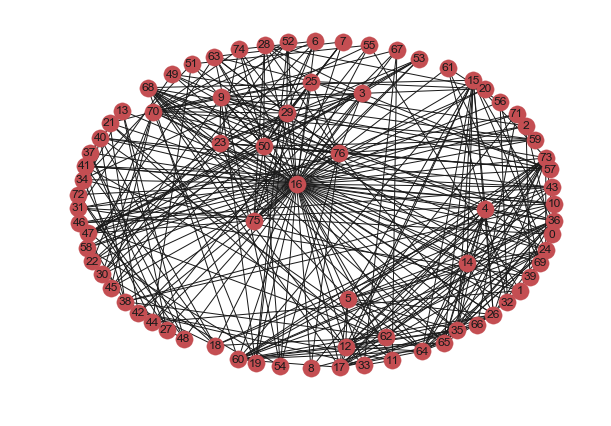

In [236]:
nx.draw(G,pos, with_labels= True)

In [234]:
import matplotlib.pyplot as plt
blues = plt.get_cmap('Blues') 

In [167]:
max(max(links))

25

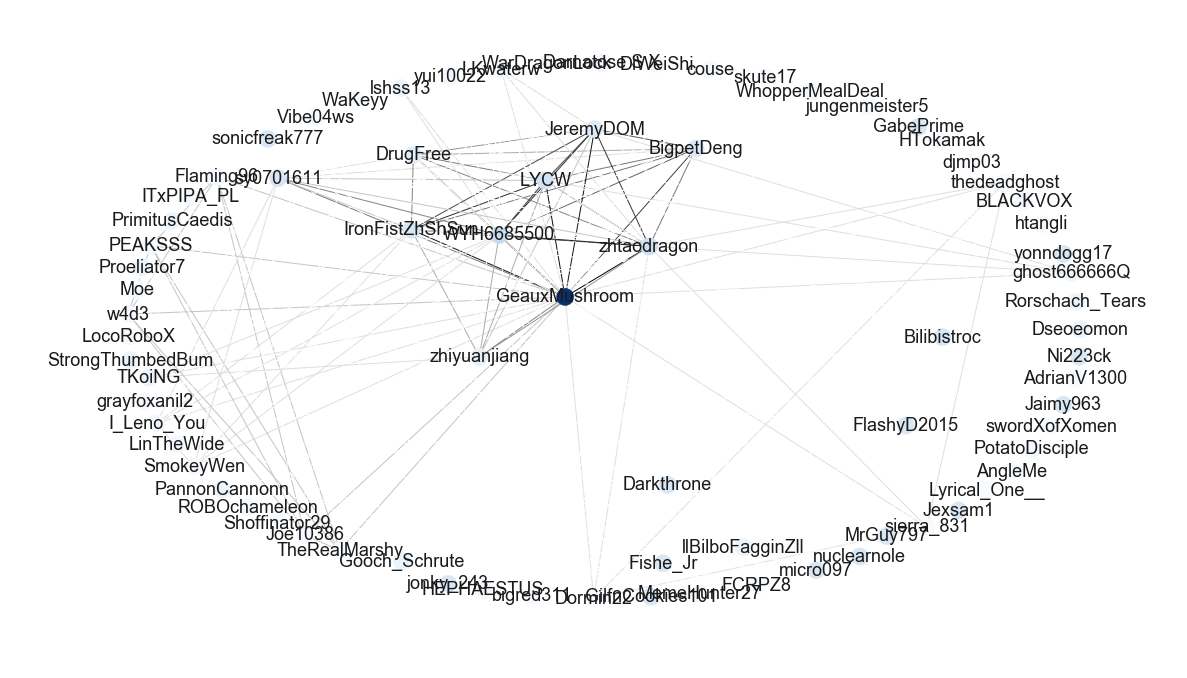

In [267]:
nx.draw(G,pos,labels=dict(zip(range(playerCount),names)), with_labels= True, edge_color= [log(G[u][v]['weight']) for u,v in G.edges() ], node_color = degree.values(), cmap = blues, font_size = 18)
plt.savefig("network.png")

In [ ]:
degree

In [315]:
import time
from pytz import timezone


In [326]:
t1 = datetime.strptime("2015-10-30T04:24:40Z", "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone('UTC'))

In [324]:
t1

datetime.datetime(2015, 10, 30, 4, 24, 40)

In [303]:
t1.tzset("UTC")

AttributeError: 'time.struct_time' object has no attribute 'tzset'

In [304]:
from datetime import datetime


In [305]:
from dateutil.relativedelta import relativedelta


In [320]:
tn = datetime.now(timezone('UTC'))

In [321]:
tn

datetime.datetime(2017, 5, 4, 15, 31, 54, 293185, tzinfo=<UTC>)

In [330]:
(tn - t1).days/28.0

19.714285714285715

In [333]:
from math import exp

0.049787068367863944

In [358]:
exp(-log(2))

0.5

In [342]:
28 * 12

336

In [345]:
exp(-12)

6.14421235332821e-06

In [346]:
usernames = ['GeauxMushroom', 'IronFistZhShSun', 'ZhtaoDragon']

In [352]:
def getMid(uname):
    url = BUNGIE + "SearchDestinyPlayer/" + AccountType + "/" + uname + "/"
    r = rq.get(url, headers=HEADERS)
    return r.json()['Response'][0][u'membershipId']

In [353]:
mids = [getMid(u) for u in usernames]

In [364]:
def getCid(mid):
    url = BUNGIE + AccountType + "/Account/" + mid + "/Summary/"
    r = rq.get(url, headers=HEADERS)
    return [c[u'characterBase']['characterId'] for c in r.json()['Response']['data']['characters']]

In [356]:
mids

[u'4611686018428698313', u'4611686018441277068', u'4611686018434658536']

In [359]:
r

<Response [200]>

In [363]:
r.json()['Response']['data']['characters'][0][u'characterBase']['characterId']

u'2305843009250714821'

In [365]:
cids = [getCid(m) for m in mids]

In [366]:
cids

[[u'2305843009250714821', u'2305843009222880461', u'2305843009216601709'],
 [u'2305843009251659092', u'2305843009296895131', u'2305843009296995477'],
 [u'2305843009218759947', u'2305843009340329188', u'2305843009345368383']]

In [374]:
games = []
for i in range(len(mids)):
    mid = mids[i]
    for j in range(len(cids[i])):
        cid = cids[i][j]
        print mid, cid
        games.append(json_normalize(findRaids(mid, cid, 50)))

4611686018428698313 2305843009250714821
4611686018428698313 2305843009222880461
4611686018428698313 2305843009216601709
4611686018441277068 2305843009251659092
4611686018441277068 2305843009296895131
4611686018441277068 2305843009296995477
4611686018434658536 2305843009218759947
4611686018434658536 2305843009340329188
4611686018434658536 2305843009345368383


In [371]:
mids

[u'4611686018428698313', u'4611686018441277068', u'4611686018434658536']

In [372]:
cids

[[u'2305843009250714821', u'2305843009222880461', u'2305843009216601709'],
 [u'2305843009251659092', u'2305843009296895131', u'2305843009296995477'],
 [u'2305843009218759947', u'2305843009340329188', u'2305843009345368383']]

In [378]:
len(games[1])

50

In [388]:
games[8]['period']

0     2017-04-26T02:22:08Z
1     2017-04-25T00:46:45Z
2     2017-04-22T20:53:35Z
3     2017-04-22T20:40:17Z
4     2017-04-22T20:10:33Z
5     2017-04-22T19:15:43Z
6     2017-04-22T19:12:14Z
7     2017-04-22T17:06:47Z
8     2017-04-22T02:23:25Z
9     2017-04-22T01:39:29Z
10    2017-04-22T01:37:10Z
11    2017-04-22T01:16:21Z
12    2017-04-22T00:35:18Z
13    2017-04-21T22:31:25Z
14    2017-04-21T02:37:23Z
15    2017-04-21T01:14:25Z
16    2017-04-19T03:22:03Z
17    2017-04-19T01:18:42Z
18    2017-04-19T01:16:34Z
19    2017-04-18T02:33:04Z
20    2017-04-15T23:28:03Z
21    2017-04-15T05:07:40Z
22    2017-04-14T22:40:02Z
23    2017-04-11T01:11:41Z
24    2017-04-11T00:37:40Z
25    2017-04-08T03:52:04Z
26    2017-04-07T21:57:34Z
27    2017-04-07T21:54:13Z
28    2017-04-07T01:57:41Z
29    2017-04-07T00:11:45Z
30    2017-04-06T19:41:58Z
31    2017-04-04T05:03:14Z
32    2017-04-04T04:54:51Z
33    2017-04-04T03:53:45Z
34    2017-04-04T02:34:12Z
35    2017-04-01T04:58:48Z
36    2017-04-01T03:26:13Z
3

In [391]:
gamesDF = pd.concat(games)

In [393]:
len(gamesDF)

450

In [401]:
gamesDF = gamesDF[['period', 'activityDetails.instanceId']].drop_duplicates()

In [418]:
gamesDF = gamesDF.reset_index()

In [403]:
gameReports = []

In [421]:
for i in range(len(gamesDF)):
    print i
    gameReports.append(getReport(gamesDF['activityDetails.instanceId'][i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [420]:
gamesDF['activityDetails.instanceId'][0]

u'6397589811'

In [424]:
gameReports[0]['period']

u'2017-05-02T14:08:20Z'

In [423]:
cPickle.dump(gameReports, open("moreRaidReports.p",'wb'))

In [502]:
def generateLinks(reports):
    playersInMatch = [getPlayers(r) for r in reports]
    today = datetime.now(timezone('UTC'))
    gameTime = [r['period'] for r in reports]
    timeDiff = [today - datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone('UTC')) for t in gameTime]
    decay = [exp(-log(2.0)* t.days/28.0) for t in timeDiff]
    players = set([])
    for m in playersInMatch:
        players |= set(m)
    names = sorted(players)
    namesmap = dict(zip(names, range(len(names))))
    playerCount = len(names)
    
    links = [[0] * playerCount for _ in range(playerCount)]
    for m in range(len(reports)):
        t = decay[m]
        p = list(set(playersInMatch[m]))    
        for i in range(len(p)):
            idx1 = namesmap[p[i]]
            for j in range(i+1, len(p)):
                idx2 = namesmap[p[j]]
                links[idx1][idx2] += t
                links[idx2][idx1] += t
    return links, names

def generateGraph(playerCount, links):            
    G=nx.Graph()
    G.add_nodes_from(range(playerCount))
    for i in range(playerCount):
        for j in range(i+1, playerCount):
            if links[i][j] > 0:
                G.add_edge(i,j, weight = links[i][j])
    return G
    

In [503]:
G2 = generateGraph(len(names), links)

In [616]:
pos = nx.spring_layout(G2, k = 0.7)

In [464]:
len(names)

765

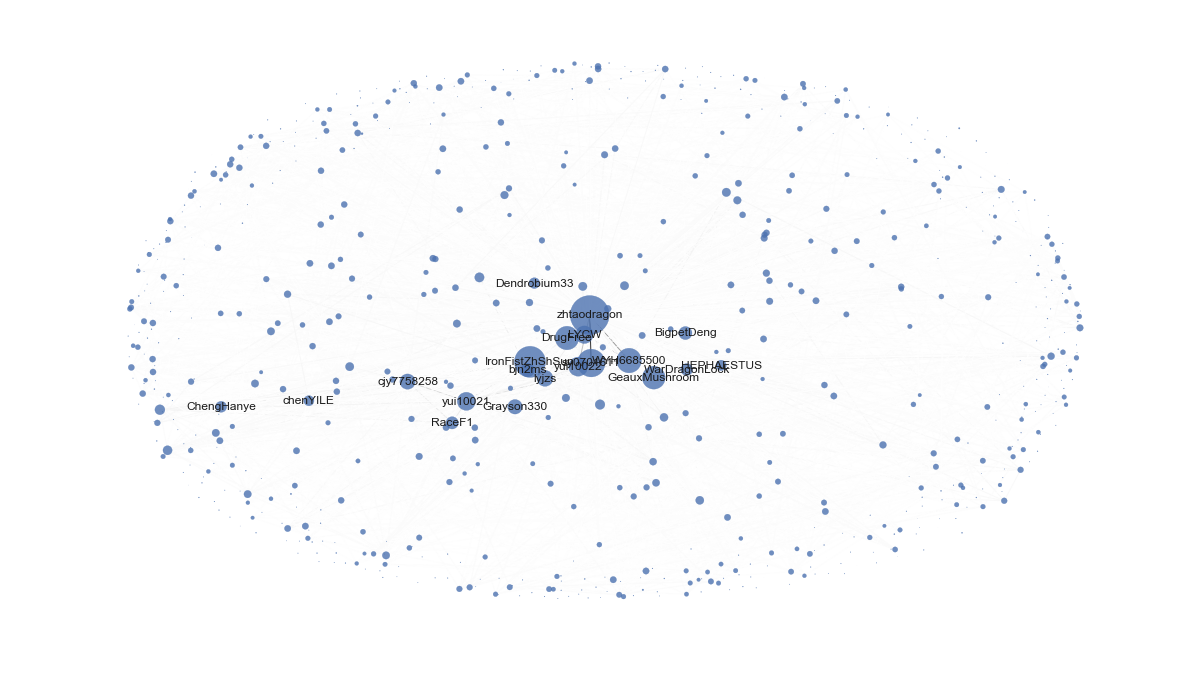

In [617]:
nx.draw(G2, pos, with_labels= False, edge_color= [G2[u][v]['weight'] for u,v in G2.edges()], node_size= w, node_color ='b',  cmap = blues, alpha=0.8)
nx.draw(G2, pos, nodelist = bestNodes,  labels = lbs, alpha = 0)
plt.savefig("raidNet.png")

In [537]:
156,196, 762

(156, 196, 762)

In [585]:
sorted(enumerate(w), key = lambda x:x[1], reverse = True)

[(762, 1526.4307265493362),
 (196, 970.7269635257474),
 (717, 770.5721718919079),
 (468, 605.2708353468747),
 (122, 553.4269945843927),
 (156, 526.6444599371971),
 (757, 365.77848910981743),
 (756, 328.0349613456291),
 (244, 310.8629227765803),
 (646, 257.5835558834055),
 (543, 234.89534636243405),
 (169, 211.98813867736393),
 (526, 185.20950484667674),
 (36, 171.8430833073762),
 (353, 151.2985843713197),
 (470, 143.260505242375),
 (70, 121.21631171209081),
 (104, 116.92109990299657),
 (174, 107.52673964053724),
 (540, 104.80566548368223),
 (511, 99.12687444340243),
 (673, 94.42278008084347),
 (386, 88.91140341266278),
 (736, 84.21749921011511),
 (633, 73.05892716373623),
 (700, 72.48298554327144),
 (105, 71.79029064852129),
 (760, 71.02823338105355),
 (56, 68.2884049436801),
 (617, 66.80644324081453),
 (41, 59.99845070312305),
 (347, 59.439771565477926),
 (392, 58.700221560278976),
 (408, 56.87592657331949),
 (64, 56.02823338105355),
 (109, 56.02823338105355),
 (480, 56.02823338105355

In [586]:
bestNodes = [i[0] for i in sorted(enumerate(w), key = lambda x:x[1], reverse = True)[:20]]

In [587]:
bestNodes

[762,
 196,
 717,
 468,
 122,
 156,
 757,
 756,
 244,
 646,
 543,
 169,
 526,
 36,
 353,
 470,
 70,
 104,
 174,
 540]

In [596]:
lbs = {n: names[n] for n in bestNodes}

In [597]:
lbs

{36: u'BigpetDeng',
 70: u'ChengHanye',
 104: u'Dendrobium33',
 122: u'DrugFree',
 156: u'GeauxMushroom',
 169: u'Grayson330',
 174: u'HEPHAESTUS',
 196: u'IronFistZhShSun',
 244: u'LYCW',
 353: u'RaceF1',
 468: u'WYH6685500',
 470: u'WarDragonLock',
 526: u'bjn2ms',
 540: u'chenYILE',
 543: u'cjy7758258',
 646: u'lyjzs',
 717: u'sy0701611',
 756: u'yui10021',
 757: u'yui10022',
 762: u'zhtaodragon'}